https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

Leanr about PCA and how it can be leveraged (tận dụng) to extract information from the data without any supervision using 2 popular datasets: Breast Cancer and CIFAR-10

Where all you can appy PCA?
- Data Visualization: find out how the variables are correlated or understanding the distribution of a few variables. PCA helps it since it projects the data into a lower dimension., thereby allowing to visualize the data in a 2D or 3D space with a naked eye.
- Speeding ML algorithm: since PCA's main idea is dimensionality reduction, we can leverage that to speed up our ML algorithm's traing and testing time considering our data has a lot of features, and the ML algorithm's learning is too slow

At an abstract level, you take a dataset having many features, and you simplify that dataset by selecting a few Principal Components from original features.

- Breast Cancer (numerical): 
    + a real-valued multivariate data (đa biến có giá trị thực) consists of 2 classes: has breast cancer or not. 2 categories: malignant and benign (ác tính và lành tính)
    + Malignant class: 212 samples; benign class: 357 samples
    + 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.
- CIFAR - 10:
    + 60,000 images each of 32x32x3 color images having 10 classes, with 6000 images per category.
    + 50,000 training images and 10,000 test images
    + Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

###### Data Exploration

Loading and analyzing both datasets. By now we have an idea regarding the dimensionality of both datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn.datasets import load_breast_cancer

# Use a magic (%) command %matplotlib inline 
# to tell the jupyter notebook to show the output within the notebook itself
%matplotlib inline

breast = load_breast_cancer()
breast_data = breast.data

breast_data.shape

(569, 30)

Result: 2 dimensions with the outermost dimension will have 569 arrays, each with 30 elements.

In [2]:
breast_labels = breast.target

breast_labels.shape

(569,)

Reshaping the breast_labels to concatenate it with the breast_data to finally create a DataFrame which will have both the data and labels.

In [3]:
# 2-D with 569 arrays, each with 1 element
new_shape = (len(breast_labels), 1)

labels = np.reshape(breast_labels, new_shape)
labels.shape

(569, 1)

Concatenate the data and labels along the 2nd axis, which means the the final shape of the array will be (569 x 30) + (569 x 1) = (569 x 31)

In [4]:
axis_col = 1
final_breast_data = np.concatenate([breast_data, labels], axis=axis_col)

final_breast_data.shape

(569, 31)

Create the DataFrame of the final data to represent the data in a tabular fashion.

In [5]:
breast_dataset = pd.DataFrame(final_breast_data)

Print the features that are there in the breast cancer dataset

In [6]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Note in the features array, the label field is missing.

We have to manually add it to the features array since you'll be equating this array with the column names of our breast_dataset dataframe.

In [7]:
features_labels = np.append(features,'label')

Embed the column names to the breast_dataset dataframe

In [8]:
breast_dataset.columns = features_labels

breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Since the original labels are in 0 and 1 format, we will change the labels to benign and malignant.

Use inplace=True will modify the dataframe.

In [9]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

Print the last few rows of the breast_dataset

In [10]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


CIFAR-10 Image Data Exploration

Using a deep learning library called Keras

In [11]:
from keras.datasets import cifar10

Using TensorFlow backend.


Using the .load_data() method to download the data. It'll download and sotre the data in our Keras directory.

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

The above line of code returns training and test images along with the labels

Print the shape of training and testing images shape

In [13]:
print('Training data shape:',x_train.shape)
print('Testing data shape:',x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


Print the shape of the labels

In [14]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

Find out the total number of labels and the various kinds of classes the data has

In [15]:
# find the unique numbers from the train labels
classes = np.unique(y_train)
number_of_classes = len(classes)

print('Total no. outputs: ', number_of_classes)
print('Output classes: ', classes)

Total no. outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


For a better understanding, let's create a dictionary that will have class names with their corresponding categorical class labels

In [16]:
label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


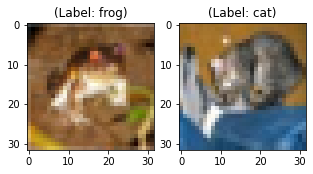

In [17]:
pl.figure(figsize=[5,5])

# display the first image in training data
pl.subplot(121)

# (32, 32, 3)
reshaped_arr = x_train[0]
new_shape = reshaped_arr.shape
cur_img = np.reshape(reshaped_arr, new_shape)
pl.imshow(cur_img)

obj_index = y_train[0][0]
class_name = label_dict[obj_index]
print(pl.title('(Label: '+class_name+')'))

# display the first image in testing data
pl.subplot(122)

reshaped_arr = x_test[0]
new_shape = reshaped_arr.shape
cur_img = np.reshape(reshaped_arr, new_shape)

pl.imshow(cur_img)

obj_index = y_test[0][0]
class_name = label_dict[obj_index]
print(pl.title('(Label: '+class_name+')'))

##### Data Visualization using PCA
###### Visualizing the Breast Cancer data
Start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data

It's a common practice to normalize our data (1 thực tế phổ biến là chuẩn hóa dữ liệu) before feeding it to any ML algorithm.

To apply normalization, we'll import StandardScaler module from the sklearn library and select only the features from the breast_dataset we create in the Data Exploration step.

Once we have the features, we'll then apply scaling by doing fit_transform (fit + transform) on the feature data.

While applying StandardScaler, each feature of your data should be normally distributed such that (sao cho) it'll scale the distribution to (chia tỷ lệ phân phối thành) a mean of zero and a standard deviation of one.

In [18]:
from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)      # normalizing the features

In [19]:
x.shape

(569, 30)

Check whether the normalized data has a mean of zero and a standard deviation of one.

In [20]:
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

Convert the normalized features into a tabular format with the help of DataFrame

In [21]:
nFeatures = x.shape[1]  # 30 features
nFeatures

feature_cols = ['feature' + str(i) for i in range(nFeatures)]

In [22]:
normalized_breast = pd.DataFrame(x, columns = feature_cols)

normalized_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


Now comes the critical part, the next few lines of code will be projecting (sẽ chiếu) the 30-dimensional Breast Cancer data to 2-D principal components.

Using the sklearn library to import the PCA model, and in the PCA method, you'll pass the number of components (n_components = 2) and finally call fit_transform on the aggregate data.

Here, several components represent the lower dimension in which we'll project our higher dimension data

In [23]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components = 2)
principalComponents_breast = pca_breast.fit_transform(x)

Create a DataFrame that will have the principal component values for all 569 samples

In [24]:
principal_breast_df = pd.DataFrame(data = principalComponents_breast, columns = ['principal component 1', 'principal component 2'])
principal_breast_df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


Once we have the principal components, we can find the explained_variance_ratio. It'll provide us with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [25]:
ratio_hold_info_2components = pca_breast.explained_variance_ratio_

title = 'Explained variation per principal component: {}'
print(title.format(ratio_hold_info_2components))

Explained variation per principal component: [0.44272026 0.18971182]


We can observe that the principal component 1 holds 44% of the information while the principal component 2 holds only 19% of the information. 

Also, the other point to note is that while projecting 30-dimensional data to a 2-D data, (100% - (44%+19%)) = 36.8% information was lost

Plot the visualization of 569 samples along the principal component - 1 and principal component - 2 axis. It should give us good insight into how our samples are distributed among the 2 classes.

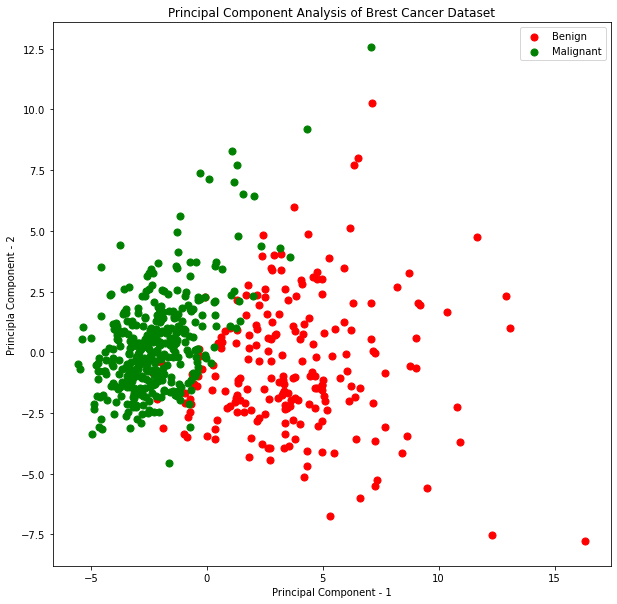

In [26]:
pl.figure(figsize=(10,10))

pl.xlabel('Principal Component - 1')
pl.ylabel('Principla Component - 2')
pl.title('Principal Component Analysis of Brest Cancer Dataset')

targets = ['Benign', 'Malignant']
colors = ['r','g']

for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    x_values = principal_breast_df.loc[indicesToKeep, 'principal component 1']
    y_values = principal_breast_df.loc[indicesToKeep, 'principal component 2']
    point_size = 50
    pl.scatter(x_values, y_values, c=color, s=point_size)
    
pl.legend(targets)

We can observe that the two classes benign and malignant when projected to a 2-D space, can be linearly separable up to some extent (phân tách tuyến tính ở một mức độ nào đó).

Other observations can be that the benign class is spread out (dàn trải) as compared to the malignant class.

###### Visualizing the CIFAR - 10 data

Preety similar to the PCA visualization of the Breast Cancer data.

Check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive (bao gồm).

In [27]:
np.min(x_train), np.max(x_train)

(0, 255)

In [28]:
x_train = x_train / np.max(x_train)

np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [29]:
x_train.shape

(50000, 32, 32, 3)

Create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.

But before that, let's reshape the image dimensions from 3 to 1 (flatten the images: from 3-D to 1-D)

In [30]:
# 32 x 32 x 3 = 3072
nPixels = len(x_train[0]) * len(x_train[0][0]) * len(x_train[0][0][0])
x_train_flat = x_train.reshape(-1, nPixels)

In [31]:
nPixels = x_train_flat.shape[1]
feat_cols = ['pixel' + str(i) for i in range(nPixels)]

In [32]:
cifar_dataframe = pd.DataFrame(x_train_flat, columns=feat_cols)

In [33]:
cifar_dataframe['label'] = y_train
print('Size of the dataframe: {}'.format(cifar_dataframe.shape))

Size of the dataframe: (50000, 3073)


The size of the dataframe is correct since there are 50,000 training images, each having 3072 pixels and an additional column for labels so in total 3073.

PCA will be applied on all the columns except the last one, which is the label for each image.

In [34]:
cifar_dataframe.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


Create the PCA method and pass the nubmer of components as 2 and apply fit_transform on the training data.

In [35]:
cifar_pca = PCA(n_components = 2)

# get all cols except the last column: label: -1
cifar_pixels_df = cifar_dataframe.iloc[:,:-1]
principalComponents_cifar = cifar_pca.fit_transform(cifar_pixels_df)

Convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame

In [36]:
principal_cifar_df = pd.DataFrame(data = principalComponents_cifar, columns = ['principal component 1', 'principal component 2'])
principal_cifar_df['y'] = y_train

In [37]:
principal_cifar_df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969241,1


Find out the amount of information or variance the principal components hold

In [38]:
print('Explained variation per principal component: {}'.format(cifar_pca.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


It looks like a decent amount of informaiton was retained by the principal components 1 and 2, given that the data was projected from 3072 dimensions to a mere 2 principal components.

Visualize the data in a 2-D space.

Remember that there is some semantic class overlap in this dataset which means that a frog can have a slightly similar shape of a cat or a deer with a dog; especially when projected in a 2-D space. 

The difference between them might not be captured that well.

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

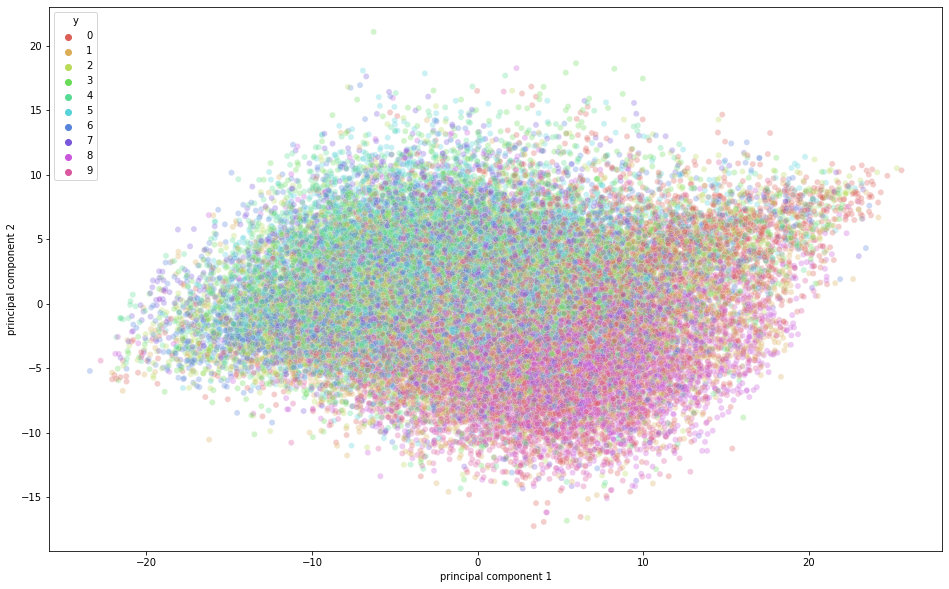

In [39]:
import seaborn as sns

x_title = 'principal component 1'
y_title = 'principal component 2'

pl.figure(figsize = (16,10))
sns.scatterplot(
    x=x_title, y=y_title, hue='y', 
    palette=sns.color_palette('hls',10), 
    data=principal_cifar_df,
    legend='full', alpha=0.3
)

We can observe that some variation was captured by the principal components since there is some structure in the points when projected along the 2 principal component axis.

The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.

###### Speed Up Deep Learning Training using PCA

Basic terminologies: https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

Let's normalize the training and testing images.

Remember the training images were normalized in the PCA visualization part, so we only need to normalize the testing images.

In [40]:
np.min(x_test), np.max(x_test)

(0, 255)

In [41]:
# find the element-wise maximum of array elements
img_grayscale_val = np.max(x_test)

x_test = x_test/img_grayscale_val

In [42]:
np.min(x_test), np.max(x_test)

(0.0, 1.0)

In [43]:
one_dimension = -1

# 32 x 32 x 3 colors
color_depth1 = len(x_test[0])
color_depth2 = len(x_test[0][0])
color_depth3 = len(x_test[0][0][0])
nPixels = color_depth1 * color_depth2 * color_depth3

x_test = x_test.reshape(one_dimension,color_depth1,color_depth2,color_depth3)
x_test.shape

(10000, 32, 32, 3)

Reshape the test data

In [44]:
x_test_flat = x_test.reshape(-1, nPixels)
x_test_flat.shape

(10000, 3072)

Make the instance of the PCA model

Pass how much variance you want PCA to capture. Let's pass 0.9 as a parameter to the PCA model, which means that PCA will hold 90% of the variance and the number of components required to capture 90% variance will be used.

Note that earlier we passed n_components as a parameter and we could then find out how much variance was captured by those 2 components. 

But here we explicitly mention how much variance we would like PCA to capture and hence, the n_components will vary based on the variance parameter.

If we don't pass any variance, then the number of components will be equal to the original dimension of the data.

In [45]:
pca = PCA(0.9)

Then we'll fit the PCA instance on the training images.

In [46]:
pca.fit(x_train_flat)

PCA(n_components=0.9)

In [47]:
PCA(copy=True, iterated_power='auto', 
    n_components=0.9, random_state=None, 
    svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

Find out how many n_components PCA used to capture 0.9 variance

In [48]:
pca.n_components_

99

Observe that to achieve 90% variance, the dimension was reduced to 99 principal components from the actual 3072 dimensions.

Apply 'transform' on both the training and test set to generate a transformed dataset from the parameters generated from the 'fit' method.

In [49]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

Import the necessary libraries to run the deep learning model

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

Convert our training and testing labels to one-hot encoding vector

In [51]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


Define the number of epochs, number of classes, and the batch size for your model.

In [52]:
# 3072/128 = 24
batch_size = 128
num_classes = 10
epochs = 20

Define our Sequential model.

In [53]:
model = Sequential()

dimensions = 99
dense = Dense(batch_size*8, activation = 'relu', input_shape=(dimensions,))
model.add(dense)

dense = Dense(batch_size*8, activation = 'relu')
model.add(dense)

dense = Dense(batch_size*4, activation = 'relu')
model.add(dense)

dense = Dense(batch_size*2, activation = 'relu')
model.add(dense)

dense = Dense(num_classes, activation = 'softmax')
model.add(dense)

The model summary

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              102400    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


Compile and train the model

In [55]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=RMSprop(), 
    metrics=['accuracy'])

x_values = train_img_pca
y_values = y_train
valid_data = (test_img_pca, y_test)

history = model.fit(
    x_values, y_values, 
    batch_size=batch_size, epochs=epochs, verbose=1, 
    validation_data=valid_data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 31s 629us/step - loss: 1.6293 - accuracy: 0.4209 - val_loss: 1.4551 - val_accuracy: 0.4798
Epoch 2/20
50000/50000 [==============================] - 32s 630us/step - loss: 1.3185 - accuracy: 0.5340 - val_loss: 1.4144 - val_accuracy: 0.5094
Epoch 3/20
50000/50000 [==============================] - 30s 600us/step - loss: 1.1393 - accuracy: 0.5942 - val_loss: 1.3626 - val_accuracy: 0.5428
Epoch 4/20
50000/50000 [==============================] - 30s 603us/step - loss: 0.9834 - accuracy: 0.6472 - val_loss: 1.3561 - val_accuracy: 0.5348
Epoch 5/20
50000/50000 [==============================] - 29s 581us/step - loss: 0.8305 - accuracy: 0.7029 - val_loss: 1.3912 - val_accuracy: 0.5539
Epoch 6/20
50000/50000 [==============================] - 28s 554us/step - loss: 0.6878 - accuracy: 0.7521 - val_loss: 1.6135 - val_accuracy: 0.5474
Epoch 7/20
50000/50000 [==============================] 

Observe that the time taken for training each epoch was just 30 seconds on a CPU. The model did a decent job on the training data, achieving 94.55% accuracy while it achieved only 55.8% accuracy on the test data. This means that it overfitted the training data. 

(so trong 20 epoch để lấy số max của accuracy và val_accuracy) 

However, remember that the data was projected to 99 dimensions from 3072 dimensions and despite that it did a great job!

Finally, let's see how much time the model takes to train on the original dataset and how much accuracy it can achive using the same deep learning model.

In [56]:
model = Sequential()

dimensions = nPixels # 3072
dense = Dense(batch_size*8, activation = 'relu', input_shape=(dimensions,))
model.add(dense)

dense = Dense(batch_size*8, activation = 'relu')
model.add(dense)

dense = Dense(batch_size*4, activation = 'relu')
model.add(dense)

dense = Dense(batch_size*2, activation = 'relu')
model.add(dense)

dense = Dense(num_classes, activation = 'softmax')
model.add(dense)

In [57]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

x_values = x_train_flat
y_values = y_train
valid_data = (x_test_flat, y_test)

history = model.fit(
    x_values, y_values, 
    batch_size=batch_size, epochs=epochs, verbose=1,
    validation_data=valid_data)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 59s 1ms/step - loss: 2.2212 - accuracy: 0.2289 - val_loss: 1.9309 - val_accuracy: 0.2780
Epoch 2/20
50000/50000 [==============================] - 63s 1ms/step - loss: 1.8543 - accuracy: 0.3339 - val_loss: 1.8414 - val_accuracy: 0.3419
Epoch 3/20
50000/50000 [==============================] - 61s 1ms/step - loss: 1.7470 - accuracy: 0.3761 - val_loss: 1.6654 - val_accuracy: 0.4142
Epoch 4/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.6755 - accuracy: 0.4017 - val_loss: 1.5971 - val_accuracy: 0.4362
Epoch 5/20
50000/50000 [==============================] - 58s 1ms/step - loss: 1.6168 - accuracy: 0.4227 - val_loss: 1.5666 - val_accuracy: 0.4452
Epoch 6/20
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5724 - accuracy: 0.4400 - val_loss: 1.6017 - val_accuracy: 0.4364
Epoch 7/20
50000/50000 [==============================] - 58s 1ms/st

It's quite evident that the time taken for training each epoch was around 23 seconds on a CPU which was almost 2 times more than the model trained on the PCA output.

Moreover, both the training and testing accuracy is less than the accuracy you achieved with the 99 principal components as an input to the model.

So, by applying PCA on the training data you were able to train our deep learning algorithm not only fast, but it also achieved better accuracy on the testing data when compared with the deep learning algorithm trained with original training data.

If you want to dive deeper into dimensionality reduction techniques then consider reading about t-distributed Stochastic Neighbor Embedding commonly known as tSNE, which is a non-linear probabilistic dimensionality reduction technique.